# Steinschlagrisiko Challenge FS24 CWM1

## Einleitung
### Aufgabenstellung
Die Kantonsstrasse unterhalb Schiers (GR) ist vom Steinschlag betroffen. Steine lösen sich von zwei unterschiedlichen Stellen an der Felswand ab (Ablösungszone 1 und Ablösungszone 2). Der betroffene Strassenabschnitt ist mit Steinfangnetzen gesichert, die jedoch in die Jahre gekommen sind und die angestrebte Sicherheit nicht mehr gewährleisten können. Die Planung für Ersatznetze hat bereits begonnen, kann aber frühstens in einem Jahr umgesetzt werden.

In den letzten Monaten haben sich mehrere Steinschlagereignisse ereignet. Kommt es im Lauf des nächsten Jahres zu weiteren vergleichbaren Ereignissen, könnten die alten Sicherheitsnetze versagen und die Verkehrsteilnehmer einem grossen Sicherheitsrisiko ausgesetzt sein. Die Bevölkerung ist verunsichert und der Kantonsingenieur muss schnell entscheiden, ob das Risiko für die Verkehrsteilnehmer zu gross ist und die Kantonsstrasse vorübergehend gesperrt werden muss. Der Kantonsingenieur hat sie beauftragt, anhand von vorhanden Daten die Wahrscheinlichkeit eines Todesfalls zu berechnen und eine Empfehlung bezüglich der Schliessung bzw Offenhaltung der Strasse auszusprechen.

Damit die Strasse offen bleiben kann, muss gezeigt werden, dass die jährliche Wahrscheinlichkeit von Todesfällen infolge Steinschlags kleiner als 0.002 ist. Für die Berechnungen soll ein gut strukturierter und dokumentierter Code in Python oder R entwickelt werden.

### Grundlagen
Für die Planung der neuen Sicherheitsnetze, hat ein beauftragter Geologe, über drei Monate Daten zu den Steinschlagereignisse aufgenommen. Dabei wurde Steingeschwindigkeit, Steinmasse und Zeitpunkt und der Zeitpunkt des Ereignis registriert. Diese Daten können von Ihnen zur Modellbildung verwendet werden und stehen unter folgenden Links zur Verfügung:

Ereignis aus Ablösungszone 1: https://www.dropbox.com/s/i58gdv6pzi03rhr/out_1.csv?dl=0

Ereignis aus Ablösungszone 2: https://www.dropbox.com/s/3nk9pv7nzz8f0qb/out_2.csv?dl=0

NB: Die Geschwindigkeit ist durch einen Radar aufgenommen und sehr präzise. Die Masse ist eine Experten-Schätzung des Geologen.

Ein beauftragtes Ingenieurbüro hat geschätzt, dass die Sicherheitsnetze bis zu einer Aufprallenergie von 1200 kJ sicher sind. Falls bereits Steine mit Gesamtmasse über 2000kg in den Sicherheitsnetzen liegen, beträgt die Aufprallenergie, die von den Sicherheitsnetzen aufgenommen werden kann, nur noch 600 kJ. Steine in den Sicherheitsnetze werden vom Unterhaltsteam entfernt (die Reaktionszeit beträgt 24 Stunden).

Das tägliche Verkehrsaufkommen beträgt 600 Autos. Stau kommt auf der Strecke nicht vor. Die Tempolimite beträgt 60 km/h.

## Data Wrangling

In [40]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

In [41]:
# load data
df1 = pd.read_csv('../daten/out_1.csv')
df2 = pd.read_csv('../daten/out_2.csv')

# show first lines
display(df1.head())
display(df2.head())

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76
0,2019-01-01,09:00,194.0,8.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,21:00,224.0,8.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-02,14:00,3104.0,9.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,15:00,228.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-05,23:00,755.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Uhrzeit,m [kg],v [m/s],Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,2019-01-01,09:00,38.0,45.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,06:00,187.0,41.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,10:00,36.0,44.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,14:00,6.0,41.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-11,06:00,65.0,39.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Die Tabellen enthalten viele Columns ohne Werte, die wir entfernen können.  
Die Beschriftung bei df2 passen wir an df1 an.  
Die Zeilen mit fehlenden Werten löschen wir.

In [42]:
# drop unused columns
df1 = df1.loc[:, ['Datum','Uhrzeit','Masse [kg]','Geschwindigkeit [m/s]']]
df2 = df2.loc[:, ['Date','Uhrzeit','m [kg]','v [m/s]']]

# rename columns according df1
df2 = df2.rename(columns={'Date':'Datum','m [kg]':'Masse [kg]','v [m/s]':'Geschwindigkeit [m/s]'})

# drop lines with NaN
df1 = df1.dropna()
df2 = df2.dropna()

# show first lines
display(df1.head())
display(df2.head())

,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s]
0,2019-01-01,09:00,194.0,8.4
1,2019-01-01,21:00,224.0,8.8
2,2019-01-02,14:00,3104.0,9.2
3,2019-01-04,15:00,228.0,8.0
4,2019-01-05,23:00,755.0,7.0


,Datum,Uhrzeit,Masse [kg],Geschwindigkeit [m/s]
0,2019-01-01,09:00,38.0,45.4
1,2019-01-03,06:00,187.0,41.6
2,2019-01-04,10:00,36.0,44.6
3,2019-01-07,14:00,6.0,41.2
4,2019-01-11,06:00,65.0,39.6


### Feature engineering
Wir berechnen zusätzlich die Energie jedes Steines mit E = 1/2mv**2. Das könnte später nützlich sein.  
Aus Datum und Uhrzeit machen wir ein DateTime Objekt und berechnen dann die Zeitintervalle.

In [43]:
# add energy column
df1['Energie [kJ]'] = 0.5 * df1['Masse [kg]'] * (df1['Geschwindigkeit [m/s]'])**2 / 1000
df2['Energie [kJ]'] = 0.5 * df2['Masse [kg]'] * (df2['Geschwindigkeit [m/s]'])**2 / 1000

# convert to datetime object
df1['Zeitpunkt'] = pd.to_datetime(df1['Datum'] + ' ' + df1['Uhrzeit'])
df2['Zeitpunkt'] = pd.to_datetime(df2['Datum'] + ' ' + df2['Uhrzeit'])

# move 'Zeitpunkt' to the first position and remove 'Datum' and 'Uhrzeit'.
df1 = df1[['Zeitpunkt', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']]
df2 = df2[['Zeitpunkt', 'Masse [kg]', 'Geschwindigkeit [m/s]', 'Energie [kJ]']]

# calculate time intervals
df1['Zeitintervall [h]'] = df1['Zeitpunkt'].diff().dt.total_seconds() / 3600
df2['Zeitintervall [h]'] = df2['Zeitpunkt'].diff().dt.total_seconds() / 3600

# show first lines
display(df1.head())
display(df2.head())

# describe the data
display(df1.describe())
display(df2.describe())

,Zeitpunkt,Masse [kg],Geschwindigkeit [m/s],Energie [kJ],Zeitintervall [h]
0,2019-01-01 09:00:00,194.0,8.4,6.84432,NaN
1,2019-01-01 21:00:00,224.0,8.8,8.67328,12.0
2,2019-01-02 14:00:00,3104.0,9.2,131.36128,17.0
3,2019-01-04 15:00:00,228.0,8.0,7.29600,49.0
4,2019-01-05 23:00:00,755.0,7.0,18.49750,32.0


,Zeitpunkt,Masse [kg],Geschwindigkeit [m/s],Energie [kJ],Zeitintervall [h]
0,2019-01-01 09:00:00,38.0,45.4,39.16204,NaN
1,2019-01-03 06:00:00,187.0,41.6,161.80736,45.0
2,2019-01-04 10:00:00,36.0,44.6,35.80488,28.0
3,2019-01-07 14:00:00,6.0,41.2,5.09232,76.0
4,2019-01-11 06:00:00,65.0,39.6,50.96520,88.0


,Zeitpunkt,Masse [kg],Geschwindigkeit [m/s],Energie [kJ],Zeitintervall [h]
count,68,68.000000,68.000000,68.000000,67.000000
mean,2019-02-12 22:08:49.411764736,628.632353,8.788235,25.197761,30.552239
min,2019-01-01 09:00:00,12.000000,3.600000,0.464640,0.000000
25%,2019-01-23 23:00:00,214.750000,7.300000,8.214900,6.000000
50%,2019-02-14 03:00:00,402.500000,8.800000,12.815133,22.000000
75%,2019-03-03 09:30:00,773.000000,10.125000,23.135955,49.000000
max,2019-03-27 16:00:00,3104.000000,14.100000,164.403200,113.000000
std,NaN,695.884703,1.989189,32.704933,27.749029


,Zeitpunkt,Masse [kg],Geschwindigkeit [m/s],Energie [kJ],Zeitintervall [h]
count,32,32.000000,32.000000,32.000000,31.000000
mean,2019-02-11 15:48:45,99.250000,37.790625,71.598225,66.322581
min,2019-01-01 09:00:00,0.000000,24.900000,0.000000,7.000000
25%,2019-01-17 17:00:00,36.750000,33.200000,26.672044,28.500000
50%,2019-02-12 12:30:00,58.000000,38.750000,39.581020,52.000000
75%,2019-03-10 17:45:00,140.000000,41.725000,63.103560,78.500000
max,2019-03-28 01:00:00,406.000000,46.500000,394.796430,212.000000
std,NaN,104.072555,5.395778,88.085802,55.178732


Die Daten von Zone 2 enthalten einen Wert 0 für die Masse.  
Das kann nicht sein. Wir ersetzen diesen Wert mit dem Median der Massen von Zone 2.

In [44]:
# calculate median
med = np.median(df2['Masse [kg]'])

# replace 0 with median
df2['Masse [kg]'] = np.where(df2['Masse [kg]'] <= 0, med, df2['Masse [kg]'])

# recalculate energy
df2['Energie [kJ]'] = 0.5 * df2['Masse [kg]'] * (df2['Geschwindigkeit [m/s]'])**2 / 1000

df2.describe()

,Zeitpunkt,Masse [kg],Geschwindigkeit [m/s],Energie [kJ],Zeitintervall [h]
count,32,32.000000,32.000000,32.000000,31.000000
mean,2019-02-11 15:48:45,101.062500,37.790625,72.543707,66.322581
min,2019-01-01 09:00:00,3.000000,24.900000,2.683935,7.000000
25%,2019-01-17 17:00:00,37.750000,33.200000,29.600176,28.500000
50%,2019-02-12 12:30:00,58.000000,38.750000,39.581020,52.000000
75%,2019-03-10 17:45:00,140.000000,41.725000,63.103560,78.500000
max,2019-03-28 01:00:00,406.000000,46.500000,394.796430,212.000000
std,NaN,102.785382,5.395778,87.452601,55.178732


## Visualizations
### Histogramme

In [45]:
# function for histogram
def plot_hist(feature: str, bin_1: int, bin_2: int, title_1: str, title_2: str) -> None:

    # 2 subplots next to each other
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # histogram for df1
    sns.histplot(df1, x = feature, ax=axs[0], color = 'skyblue', binwidth = bin_1)
    axs[0].set_title(title_1)

    # histogram for df2
    sns.histplot(df2, x = feature, ax=axs[1], color = 'lightgreen', binwidth = bin_2)
    axs[1].set_title(title_2)

    # label y axis
    axs[0].set_ylabel('Anzahl')

    plt.show()

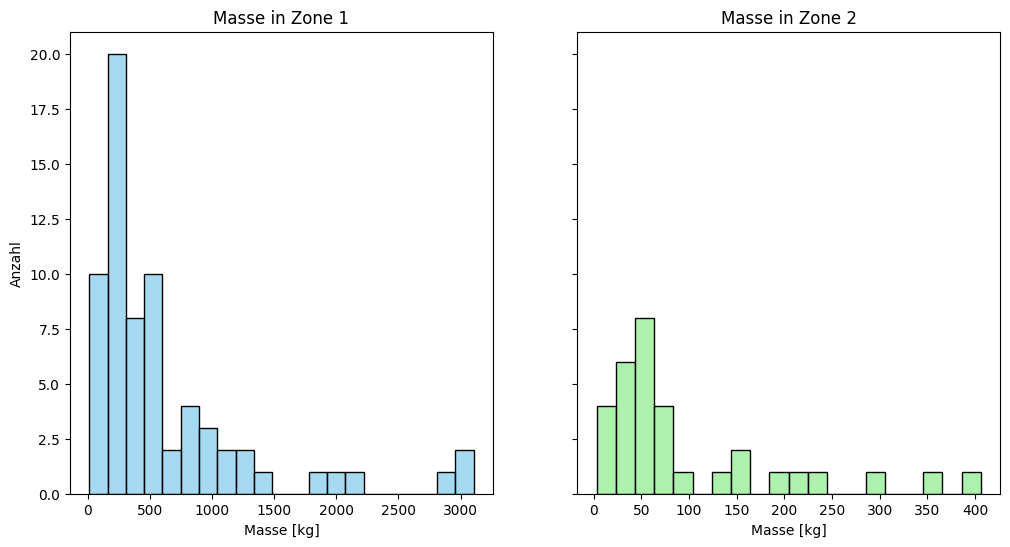

In [46]:
# plot histogram for Masse
plot_hist('Masse [kg]', 150, 20, 'Masse in Zone 1', 'Masse in Zone 2')

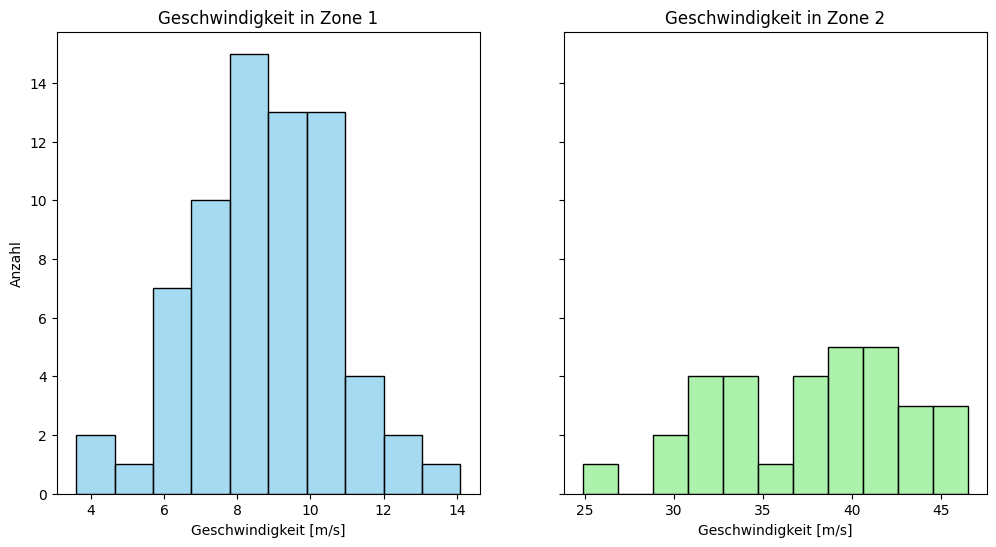

In [47]:
# plot histogram for Geschwindigkeit
plot_hist('Geschwindigkeit [m/s]', 1, 2, 'Geschwindigkeit in Zone 1', 'Geschwindigkeit in Zone 2')

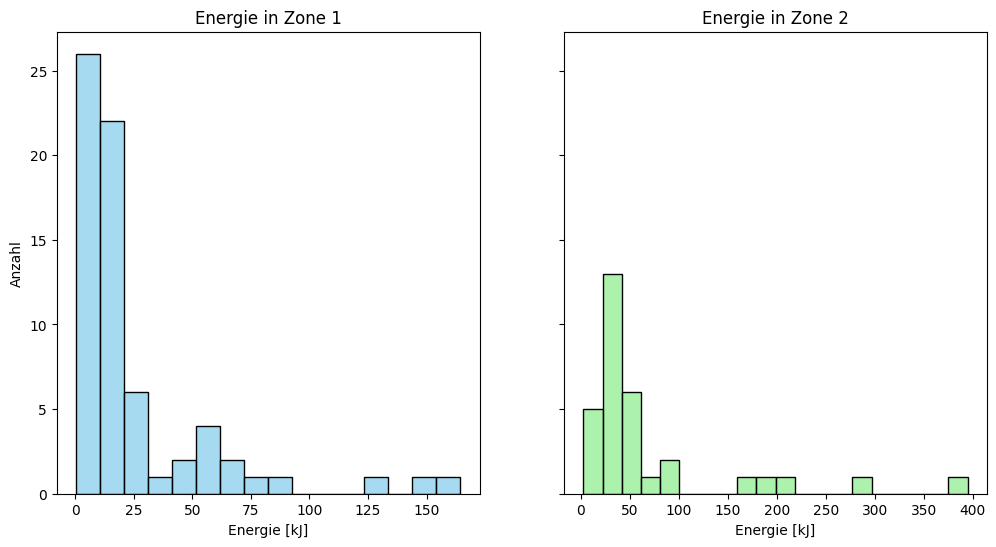

In [48]:
# plot histogram for Energie
plot_hist('Energie [kJ]', 10, 20, 'Energie in Zone 1', 'Energie in Zone 2')

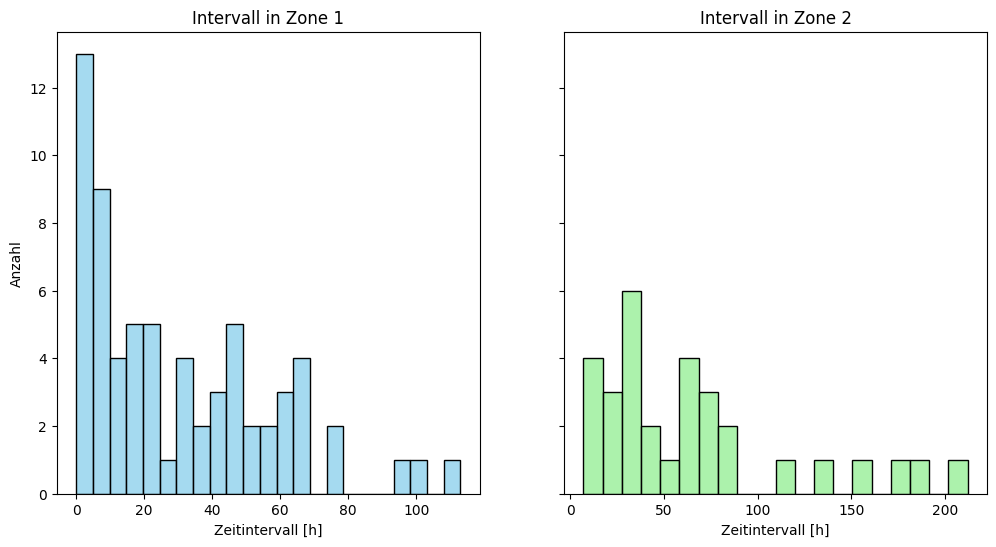

In [57]:
# plot histogram for Zeitintervall
plot_hist('Zeitintervall [h]', 5, 10, 'Intervall in Zone 1', 'Intervall in Zone 2')

### Boxplots

In [50]:
# function for boxplot
def plot_boxplot(feature: str, title: str) -> None:
    
    # 2 subplots above each other
    fig, ax = plt.subplots(figsize=(10, 6))

    # boxplot df1
    sns.boxplot(df1, x = feature, color='skyblue', orient='h', positions=[0], width=0.6)

    # boxplot df2
    sns.boxplot(df2, x = feature, color='lightgreen', orient='h', positions=[1], width=0.6)

    # label y axis
    ax.set_yticks([0, 1])
    ax.set_yticklabels(['Zone 1', 'Zone 2'])
    plt.ylim(-0.5, 1.5)

    # titel
    plt.title(title)
    plt.xlabel(feature)

    plt.show()

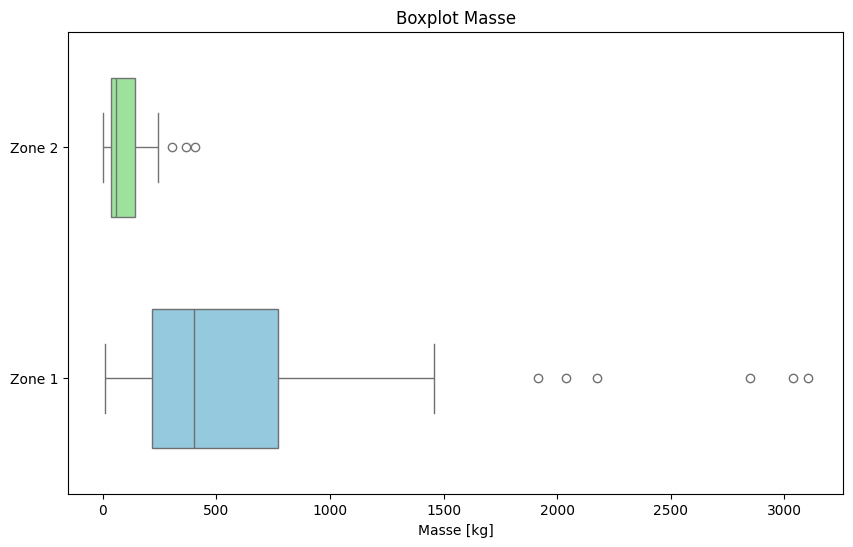

In [51]:
# boxplot for Masse
plot_boxplot('Masse [kg]', 'Boxplot Masse')

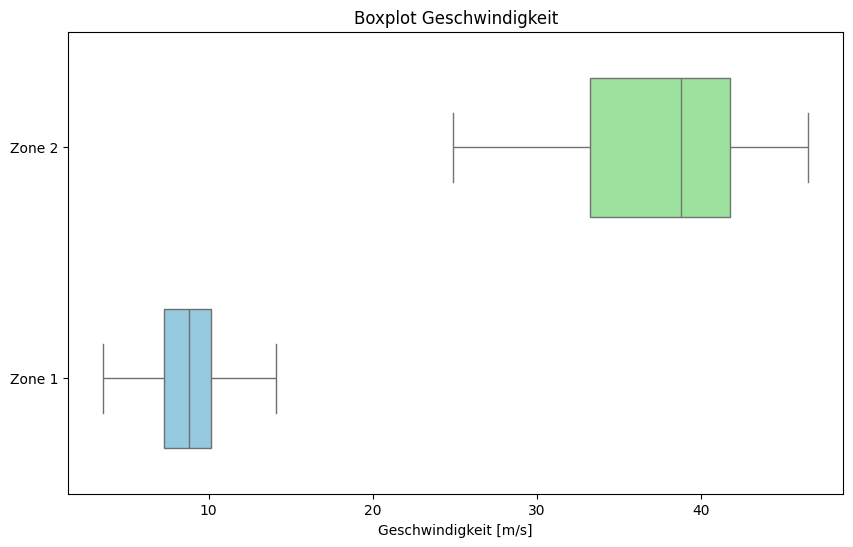

In [52]:
# boxplot for Geschwindigkeit
plot_boxplot('Geschwindigkeit [m/s]', 'Boxplot Geschwindigkeit')

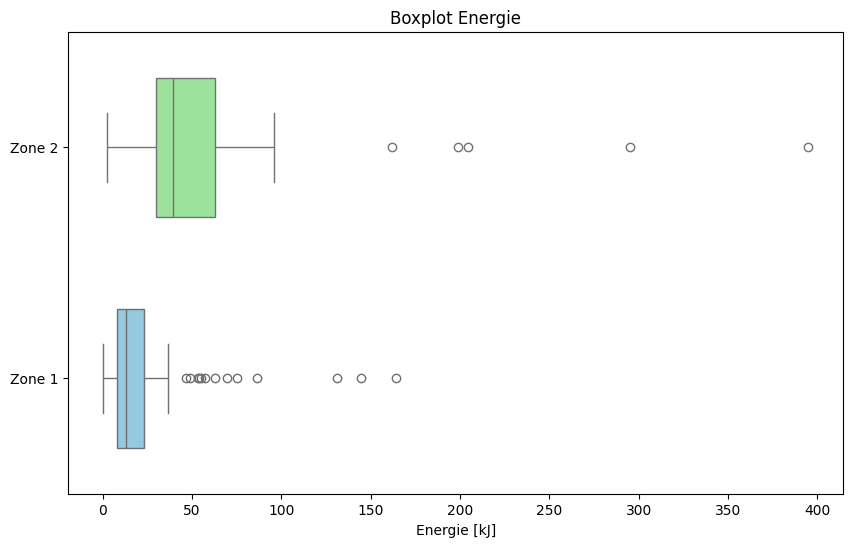

In [53]:
# boxplot for Energie
plot_boxplot('Energie [kJ]', 'Boxplot Energie')

In [ ]:
# boxplot for Zeitintervall
plot_boxplot('Zeitintervall [h]', 'Boxplot Zeitintervall')

### Scatterplots

In [54]:
# add Zone
df1['Zone'] = 'Zone 1'
df2['Zone'] = 'Zone 2'

# combine df1 and df2
df_combined = pd.concat([df1, df2])

# function for scatterplot
def plot_scatter(feature_1: str, feature_2: str, title: str) -> None:

    # scatterplot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(df_combined, x=feature_1, y=feature_2, hue='Zone', palette=['skyblue', 'lightgreen'])

    # labels
    plt.title(title)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)

    plt.show()

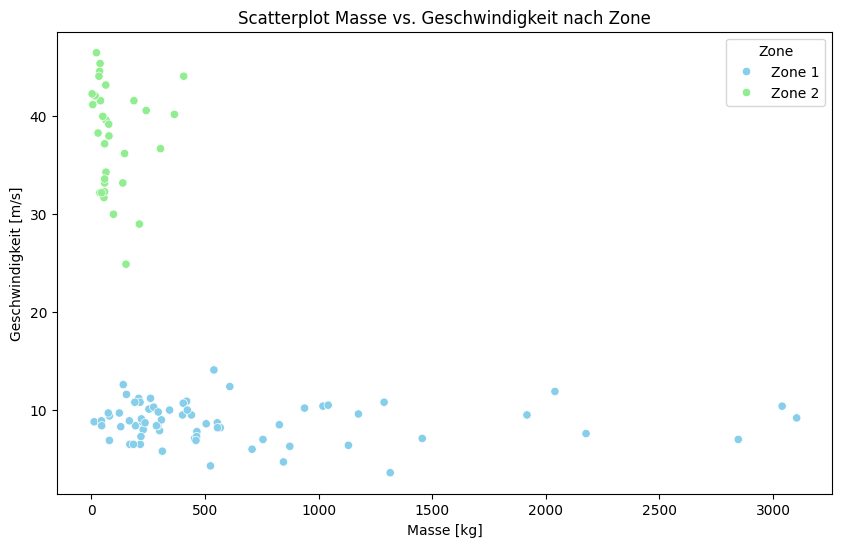

In [55]:
# scatterplot Masse vs. Geschwindigkeit
plot_scatter('Masse [kg]', 'Geschwindigkeit [m/s]', 'Scatterplot Masse vs. Geschwindigkeit nach Zone')

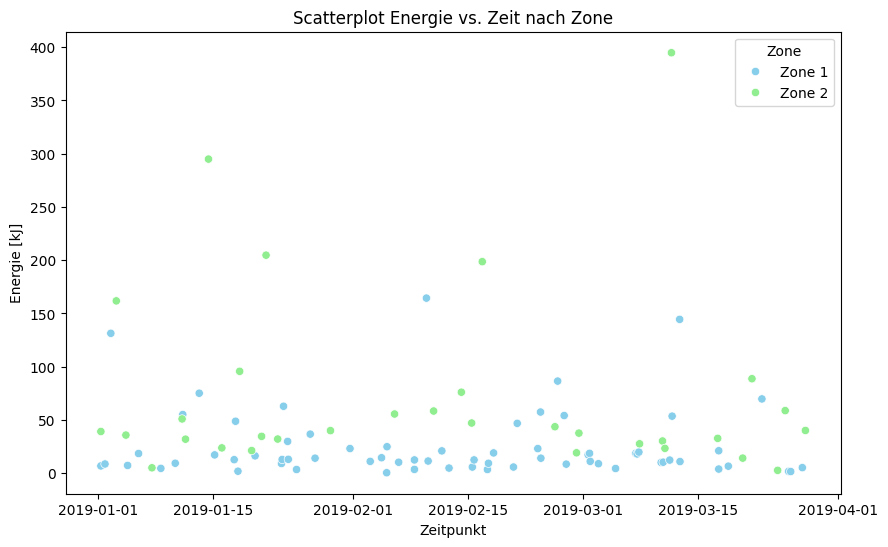

In [56]:
# scatterplot Energie vs. Zeit
plot_scatter('Zeitpunkt', 'Energie [kJ]', 'Scatterplot Energie vs. Zeit nach Zone')